In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
% matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
UsageError: Line magic function `%` not found.


In [2]:
#Load data into a pandas dataframe here
df = pd.read_csv("cleaned_data_ Folder/cleaned_Pond2.csv",delimiter=',',low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [27]:
df.isnull().sum()

Temperature         0
Turbidity           0
Dissolved Oxygen    0
PH                  0
Ammonia             0
Nitrate             0
Population          0
Fish_Length         0
Fish_Weight         0
Datetime            0
Date                0
Time                0
Weight_diff         0
dtype: int64

In [3]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Weight_diff
0,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05,2021-06-19,00:00:05,0.7
1,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02,2021-06-19,00:01:02,0.0
2,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22,2021-06-19,00:01:22,0.0
3,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44,2021-06-19,00:01:44,0.0
4,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07,2021-06-19,00:02:07,0.0


In [4]:
#Group the dataframe by date, and calculate the mean of each column
df_daily = df.groupby("Date").mean()

<ipython-input-4-8b0b896761bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.groupby("Date").mean()


In [5]:
df_daily.head(10)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
Date,,,,,,,,,,
2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
2021-06-24,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-28,25.041425,100.0,12.966972,7.954560,1.177527e+09,128.929399,50.0,10.11,9.66,0.000738
2021-06-29,24.588952,100.0,7.765548,7.915420,1.147163e+08,124.744759,50.0,10.46,10.36,0.000198
2021-06-30,24.627739,100.0,12.505438,7.862415,6.431289e+08,128.574675,50.0,10.81,11.06,0.000379


In [6]:
df_daily.reset_index(inplace=True)

In [7]:
df_daily.head(10)

,Date,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
1,2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2,2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
3,2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
4,2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
5,2021-06-24,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
6,2021-06-28,25.041425,100.0,12.966972,7.954560,1.177527e+09,128.929399,50.0,10.11,9.66,0.000738
7,2021-06-29,24.588952,100.0,7.765548,7.915420,1.147163e+08,124.744759,50.0,10.46,10.36,0.000198
8,2021-06-30,24.627739,100.0,12.505438,7.862415,6.431289e+08,128.574675,50.0,10.81,11.06,0.000379
9,2021-07-01,25.113684,100.0,12.660978,7.820643,1.107414e+09,135.042725,50.0,11.16,11.76,0.000209


In [8]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'],infer_datetime_format=True)

In [9]:
df_daily.set_index("Date",inplace=True)

In [10]:
df_daily=df_daily.resample('D').ffill()

In [11]:
df_daily.head(10)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
Date,,,,,,,,,,
2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
2021-06-24,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-25,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-26,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
2021-06-27,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513


In [12]:
df_daily.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
count,134.000000,134.000000,134.000000,134.000000,1.340000e+02,134.000000,134.0,134.000000,134.000000,134.000000
mean,24.866329,94.963254,7.102490,5.152408,2.240661e+08,754.507527,50.0,22.955970,144.646122,0.031205
std,0.839359,15.947056,8.433696,3.259106,6.913250e+08,410.784282,0.0,8.415488,126.375655,0.111149
min,23.411385,8.371278,0.701900,-1.879320,3.426739e-01,117.592593,50.0,6.960000,3.360000,0.000177
25%,24.235536,100.000000,2.743432,2.466249,2.628410e+00,210.571204,50.0,15.960000,33.375000,0.000591
50%,24.635784,100.000000,3.200000,7.005494,1.136471e+01,936.522222,50.0,22.810000,95.800000,0.001835
75%,25.381835,100.000000,8.269483,7.420261,6.115488e+05,1070.010373,50.0,32.177500,294.525000,0.017178
max,26.746610,100.000000,38.687122,8.405416,4.589569e+09,1263.769960,50.0,35.320000,391.090000,0.941000


In [13]:
df_daily.reset_index(inplace=True)

In [14]:
df_daily.head(10)

,Date,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-06-19,25.428088,100.0,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
1,2021-06-20,25.948557,100.0,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2,2021-06-21,25.349366,100.0,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
3,2021-06-22,25.055735,100.0,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
4,2021-06-23,24.505092,100.0,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
5,2021-06-24,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
6,2021-06-25,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
7,2021-06-26,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
8,2021-06-27,24.432276,100.0,13.445173,8.226859,9.929543e+07,146.845308,50.0,8.71,6.86,0.000513
9,2021-06-28,25.041425,100.0,12.966972,7.954560,1.177527e+09,128.929399,50.0,10.11,9.66,0.000738


In [15]:
df_daily.columns

Index(['Date', 'Temperature', 'Turbidity', 'Dissolved Oxygen', 'PH', 'Ammonia',
       'Nitrate', 'Population', 'Fish_Length', 'Fish_Weight', 'Weight_diff'],
      dtype='object')

In [16]:
X_test = df_daily[['Temperature', 'Turbidity', 'Dissolved Oxygen', 'PH', 'Ammonia','Nitrate']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_norm = scaler.transform(X_test)


In [17]:
# we'll start out with a 5 minute input sequence and a one day predictive horizon
seq_arrays = []
seq_labs = []
seq_length = 5
ph = 1
num_rows=df_daily.shape[0]

#create list of sequence length Temperature readings
for start in range(0,num_rows-seq_length-ph):
    seq_arrays.append(X_test_norm[start:start+seq_length])
    seq_labs.append([df_daily['Weight_diff'].iloc[start:start+seq_length+1].to_numpy()[-1]])

seq_arrays = np.array(seq_arrays, dtype = object).astype(np.float32)
seq_labs = np.array(seq_labs, dtype = object).astype(np.float32)

In [18]:
print(seq_arrays.shape, seq_labs.shape)

(128, 5, 6) (128, 1)


# Reloading the model

In [19]:
# define the path to the h5 file containing the saved model
model_path = 'Weight_CNN_LSTM_model5.h5'

# load the model from the h5 file
model = tf.keras.models.load_model(model_path)

In [20]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 5, 32)             416       
                                                                 
 batch_normalization_36 (Bat  (None, 5, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_36 (Dropout)        (None, 5, 32)             0         
                                                                 
 conv1d_37 (Conv1D)          (None, 5, 48)             3120      
                                                                 
 batch_normalization_37 (Bat  (None, 5, 48)            192       
 chNormalization)                                                
                                                                 
 dropout_37 (Dropout)        (None, 5, 48)           

4/4 - 0s - loss: 0.0251 - mse: 0.0251 - 411ms/epoch - 103ms/step

MSE: 0.025067932903766632
4/4 [==============================] - 0s 2ms/step


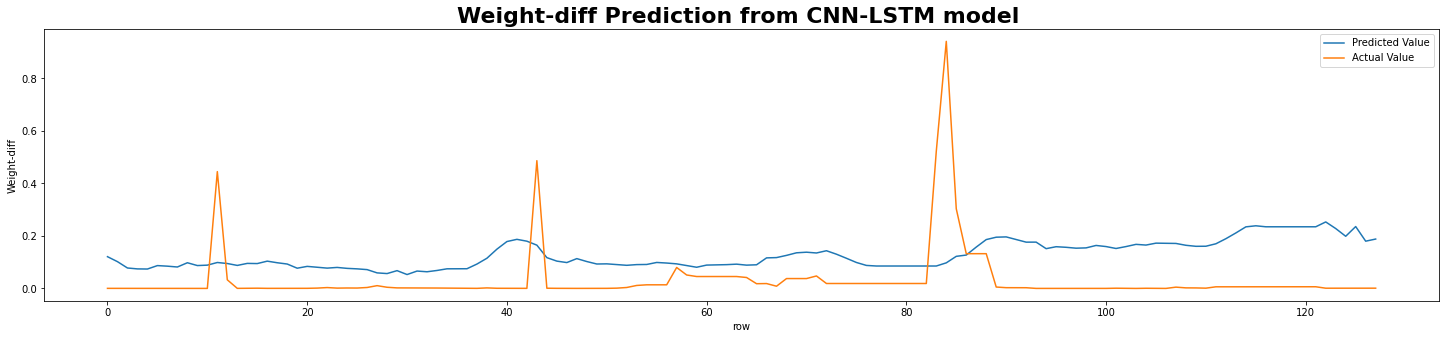

In [21]:
scores_test = model.evaluate(seq_arrays, seq_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))

y_pred_test = model.predict(seq_arrays)
y_true_test = seq_labs

test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('Weight-diff_predictions_Pond2.csv', index = None)

# Plot the predicted data vs. the actual data
# we will limit our plot to the first 200 predictions for better visualization
fig_verify = plt.figure(figsize=(25, 5))
# plt.plot(y_pred_test[-100:], label = 'Predicted Value')
# plt.plot(y_true_test[-100:], label = 'Actual Value')
plt.plot(y_pred_test, label = 'Predicted Value')
plt.plot(y_true_test, label = 'Actual Value')
plt.title('Weight-diff Prediction from CNN-LSTM model ', fontsize=22, fontweight='bold')
plt.ylabel('Weight-diff')
plt.xlabel('row')
plt.legend()
plt.show()
fig_verify.savefig("Weight-diff_Predictions_Pond2.png")

In [22]:
df_daily.to_csv('Average_Pond2.csv', index = None)

In [23]:
df_daily

,Date,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-06-19,25.428088,100.000000,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,0.000226
1,2021-06-20,25.948557,100.000000,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.000218
2,2021-06-21,25.349366,100.000000,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.000623
3,2021-06-22,25.055735,100.000000,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.000601
4,2021-06-23,24.505092,100.000000,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.000280
...,...,...,...,...,...,...,...,...,...,...,...
129,2021-10-26,25.366049,93.392590,4.660648,-0.439943,3.665877e+09,979.553972,50.0,35.04,376.81,0.001272
130,2021-10-27,25.300742,70.086057,18.345900,-1.845440,7.387274e+08,1046.291194,50.0,35.11,380.38,0.001191
131,2021-10-28,25.638997,55.569475,34.954299,-1.879320,3.089474e+09,875.592757,50.0,35.18,383.95,0.001319
132,2021-10-29,25.663215,55.752646,28.032436,-1.877371,1.986513e+02,1073.905423,50.0,35.25,387.52,0.001181


In [25]:
y_true_test

array([[5.1319646e-04],
       [5.1319646e-04],
       [5.1319646e-04],
       [5.1319646e-04],
       [7.3761854e-04],
       [1.9830029e-04],
       [3.7878787e-04],
       [2.0914251e-04],
       [1.7650303e-04],
       [2.6153395e-04],
       [3.1627578e-04],
       [4.4499999e-01],
       [3.2962963e-02],
       [5.0056243e-04],
       [1.0229885e-03],
       [1.1323155e-03],
       [5.3293415e-04],
       [6.0668029e-04],
       [8.4440230e-04],
       [5.8784673e-04],
       [6.6666666e-04],
       [1.4710744e-03],
       [3.5319149e-03],
       [1.4464803e-03],
       [1.9230769e-03],
       [1.6949152e-03],
       [3.8167939e-03],
       [1.0791367e-02],
       [4.6728970e-03],
       [2.2692890e-03],
       [2.1770683e-03],
       [1.7084283e-03],
       [1.9946808e-03],
       [1.7462166e-03],
       [1.3648772e-03],
       [1.1801731e-03],
       [4.5031522e-04],
       [5.5032037e-04],
       [2.2530863e-03],
       [8.1976416e-04],
       [6.8160595e-04],
       [8.304892

In [26]:
y_pred_test

array([[0.12114126],
       [0.10216687],
       [0.07805962],
       [0.0746106 ],
       [0.07412302],
       [0.0871819 ],
       [0.08500688],
       [0.08183072],
       [0.09801526],
       [0.08732864],
       [0.08886117],
       [0.09898981],
       [0.09510397],
       [0.08786524],
       [0.0955703 ],
       [0.09488907],
       [0.10411035],
       [0.09801931],
       [0.09313201],
       [0.07725736],
       [0.08418832],
       [0.08068664],
       [0.07756681],
       [0.08019991],
       [0.07661615],
       [0.07476716],
       [0.07189009],
       [0.05943787],
       [0.05683379],
       [0.06795381],
       [0.05311845],
       [0.06636787],
       [0.06369524],
       [0.0686383 ],
       [0.07493085],
       [0.07527784],
       [0.07523508],
       [0.09307919],
       [0.11522233],
       [0.14979285],
       [0.17875162],
       [0.18714774],
       [0.18011096],
       [0.1650289 ],
       [0.11747594],
       [0.104243  ],
       [0.09873184],
       [0.113

In [28]:
import pickle as pkl
with open('saved_model.pkl', 'rb') as f:
    model = pkl.load(f)